In [349]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [350]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/global_average_temp_increase.csv', index_col='Year', parse_dates=True)
raw_df

,Temperature increase in celsius
Year,
1880-01-01,-0.09
1881-01-01,0.05
1882-01-01,0.00
1883-01-01,-0.18
1884-01-01,-0.28
...,...
2016-01-01,1.31
2017-01-01,1.08
2018-01-01,0.89


In [351]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

,Year,Temperature increase in celsius
0,1880-01-01,-0.09
1,1881-01-01,0.05
2,1882-01-01,0.00
3,1883-01-01,-0.18
4,1884-01-01,-0.28


In [352]:
# Rename 'Year' and 'Temperature increase in celsius' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'Temperature increase in celsius':'y'})
df.head()

,ds,y
0,1880-01-01,-0.09
1,1881-01-01,0.05
2,1882-01-01,0.00
3,1883-01-01,-0.18
4,1884-01-01,-0.28


<AxesSubplot:xlabel='ds'>

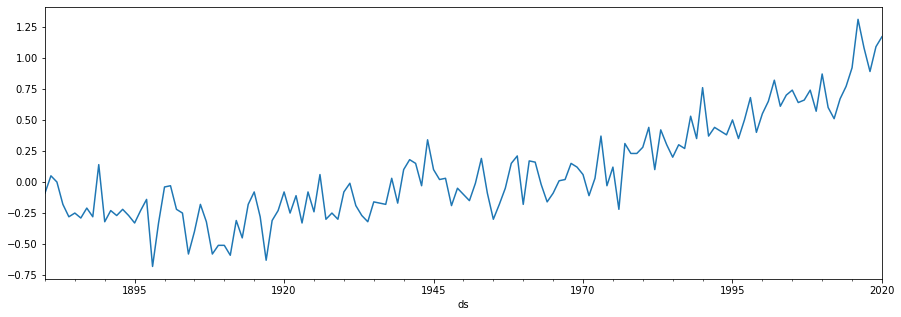

In [353]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [354]:
# Create model

model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [355]:
# Add future dates to model (11 years)

future = model.make_future_dataframe(periods=11, freq = 'y')
future.tail()

,ds
147,2026-12-31
148,2027-12-31
149,2028-12-31
150,2029-12-31
151,2030-12-31


In [356]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
147,2026-12-31,1.333139,0.552164,0.999804,1.331534,1.334913,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,0.0,0.0,0.0,0.772500
148,2027-12-31,1.347263,0.520590,0.965046,1.345266,1.349566,-0.598711,-0.598711,-0.598711,-0.598711,-0.598711,-0.598711,0.0,0.0,0.0,0.748552
149,2028-12-31,1.361425,0.654247,1.087586,1.358846,1.364192,-0.482910,-0.482910,-0.482910,-0.482910,-0.482910,-0.482910,0.0,0.0,0.0,0.878515
150,2029-12-31,1.375549,0.647440,1.070661,1.372538,1.378996,-0.522023,-0.522023,-0.522023,-0.522023,-0.522023,-0.522023,0.0,0.0,0.0,0.853526
151,2030-12-31,1.389673,0.613346,1.036436,1.386241,1.393559,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,0.0,0.0,0.0,0.829034


In [357]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
147,2026-12-31,0.772500,0.552164,0.999804
148,2027-12-31,0.748552,0.520590,0.965046
149,2028-12-31,0.878515,0.654247,1.087586
150,2029-12-31,0.853526,0.647440,1.070661
151,2030-12-31,0.829034,0.613346,1.036436


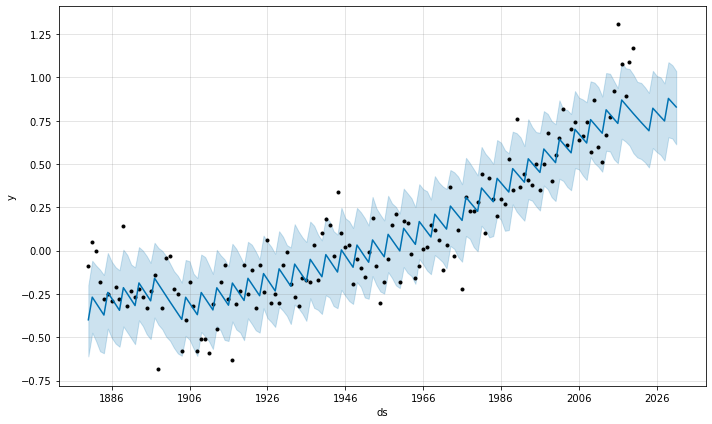

In [358]:
# Plot forecast

model.plot(forecast);

In [359]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [360]:
# Combine both dataframes

vis_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
1880-01-01,-0.09,-0.398595,-0.609700,-0.198301
1881-01-01,0.05,-0.268080,-0.473185,-0.057990
1882-01-01,0.00,-0.302596,-0.522333,-0.086128
1883-01-01,-0.18,-0.337007,-0.580241,-0.109389
1884-01-01,-0.28,-0.371262,-0.591729,-0.140500


In [361]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
1880-01-01,-0.09,-0.398595,-0.609700,-0.198301,0.671263
1881-01-01,0.05,-0.268080,-0.473185,-0.057990,0.764846
1882-01-01,0.00,-0.302596,-0.522333,-0.086128,0.738898
1883-01-01,-0.18,-0.337007,-0.580241,-0.109389,0.713904
1884-01-01,-0.28,-0.371262,-0.591729,-0.140500,0.689863


<AxesSubplot:xlabel='ds'>

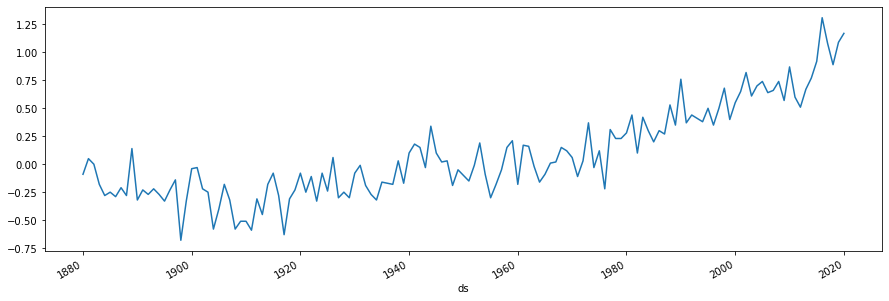

In [362]:
# Plot 'Temperature increase in celcius' and 'yhat_rescaled'

vis_df['y'].plot()

In [363]:
# Ensure df and model data are connected

df.index = pd.to_datetime(df.index) #make sure our index as a datetime object
connect_date = df.index[-2] #select the 2nd to last date

In [364]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [365]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-01-01,1.234234,0.563000,1.015562,1.234234,1.234234,-0.443347,-0.443347,-0.443347,-0.443347,-0.443347,-0.443347,0.0,0.0,0.0,0.790887
2020-12-31,1.248358,0.538353,0.974139,1.248358,1.248358,-0.482910,-0.482910,-0.482910,-0.482910,-0.482910,-0.482910,0.0,0.0,0.0,0.765448
2021-12-31,1.262482,0.529024,0.968063,1.262416,1.262537,-0.522023,-0.522023,-0.522023,-0.522023,-0.522023,-0.522023,0.0,0.0,0.0,0.740458
2022-12-31,1.276606,0.509348,0.942103,1.276327,1.276901,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,-0.560639,0.0,0.0,0.0,0.715966
2023-12-31,1.290729,0.480095,0.910316,1.290184,1.291328,-0.598711,-0.598711,-0.598711,-0.598711,-0.598711,-0.598711,0.0,0.0,0.0,0.692019


In [366]:
# Create updated dataframe

vis_df = df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [367]:
# Preview head

vis_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
1880-01-01,-0.09,NaN,NaN,NaN,NaN
1881-01-01,0.05,NaN,NaN,NaN,NaN
1882-01-01,0.00,NaN,NaN,NaN,NaN
1883-01-01,-0.18,NaN,NaN,NaN,NaN
1884-01-01,-0.28,NaN,NaN,NaN,NaN


In [368]:
# Preview tail

vis_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2026-12-31,NaN,0.772500,0.552164,0.999804,2.165172
2027-12-31,NaN,0.748552,0.520590,0.965046,2.113937
2028-12-31,NaN,0.878515,0.654247,1.087586,2.407322
2029-12-31,NaN,0.853526,0.647440,1.070661,2.347910
2030-12-31,NaN,0.829034,0.613346,1.036436,2.291103


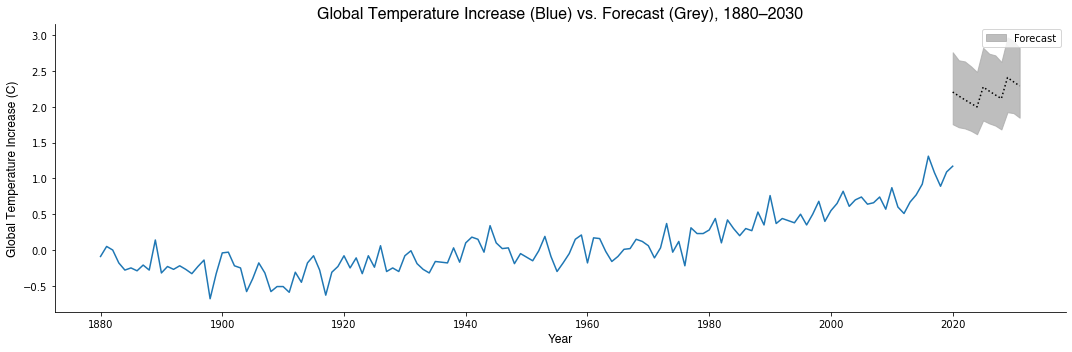

In [370]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.y)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Global Temperature Increase (Blue) vs. Forecast (Grey), 1880–2030', fontdict = font_1)
ax1.set_ylabel('Global Temperature Increase (C)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("../Images/Global_surface_temp/Global_surface_temp_forecast.png", 
            transparent=False, dpi=300)
plt.show()